## CLUSTERING
#### K-MEANS

In [88]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

## K-MEANS on a randomly generated dataset

In [89]:
np.random.seed(0)

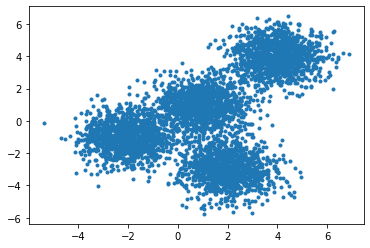

In [90]:
real_cluster_centers = [[4, 4], [-2, -1], [2, -3], [1, 1]]
X, y = make_blobs(n_samples=5000, centers=real_cluster_centers, cluster_std=0.9)

plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

## Setting up k-means

In [91]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)

In [92]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [93]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 2, 2, ..., 1, 0, 0], dtype=int32)

In [94]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03375169, -0.99827293],
       [ 3.97334234,  3.98758687],
       [ 1.99876902, -3.01796355],
       [ 0.96959198,  0.98543802]])

## VISUALIZATION

In [95]:
def plot_clusters(centers, labels, X):

    fig = plt.figure(figsize=(6, 4))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))

    ax = fig.add_subplot(1, 1, 1)

    for k, color in zip(range(len(centers)), colors):
        my_members = (labels == k)
        cluster_center = centers[k]
        ax.plot(X[my_members, 0], X[my_members, 1], 
                'w', markerfacecolor=color, marker='.')
        ax.plot(cluster_center[0], cluster_center[1], 'o',
                markerfacecolor=color, markeredgecolor='k', markersize=7)
    ax.set_title('KMeans')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()

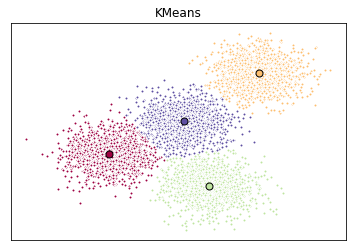

In [96]:
plot_clusters(k_means_cluster_centers, k_means_labels, X)


## Spliting into three clusters

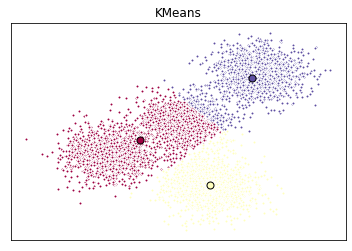

In [99]:
k_means_three = KMeans(init='k-means++', n_clusters=3, n_init=12)
k_means_three.fit(X)
plot_clusters(k_means_three.cluster_centers_, k_means_three.labels_, X)

# Customer Segmentation with K-Means

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.

In [100]:
import pandas as pd

In [101]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")

In [102]:
data.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

In [105]:
data.shape

(850, 10)

Address is a categorical variable sp we need to drop it

In [106]:
data = data.drop('Address', axis=1)
data.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

In [109]:
data.index = data['Customer Id']
data = data.drop('Customer Id', axis=1)

In [110]:
data.head()

Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
Customer Id                                                            
1             41    2               6      19      0.124       1.073   
2             47    1              26     100      4.582       8.218   
3             33    2              10      57      6.111       5.802   
4             29    2               4      19      0.681       0.516   
5             47    1              31     253      9.308       8.908   

             Defaulted  DebtIncomeRatio  
Customer Id                              
1                  0.0              6.3  
2                  0.0             12.8  
3                  1.0             20.9  
4                  0.0              6.3  
5                  0.0              7.2

In [116]:
data.isnull().values.any()

True

In [120]:
data.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [121]:
from sklearn.preprocessing import StandardScaler
X = data.values
X = np.nan_to_num(X)
dataset = StandardScaler().fit_transform(X)
dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### Modeling

In [122]:
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
print(k_means.labels_)

[2 0 2 2 1 0 2 0 2 0 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 0 2 2 0 2 0 2 2 2 2 2 2
 2 2 0 2 0 2 1 2 0 2 2 2 0 0 2 2 0 0 2 2 2 0 2 0 2 0 0 2 2 0 2 2 2 0 0 0 2
 2 2 2 2 0 2 0 0 1 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 2 2 2 0 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2 2 2 0 2 2 0 2 0 2 2 0 1 2 0 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 0 0 2 0 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 0 2 0 0 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 0 2 2 2 1 2 2 2 0 2 0 0 0 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 0 2 2 2 1 2 2 2 2 0 2 1 2 2 2 2 0 2 0 0 0 2 2 0 0 2 2 2 2 2 2
 2 0 2 2 2 2 0 2 2 2 0 2 

In [124]:
data['Clusters'] = k_means.labels_
data.head()

Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
Customer Id                                                            
1             41    2               6      19      0.124       1.073   
2             47    1              26     100      4.582       8.218   
3             33    2              10      57      6.111       5.802   
4             29    2               4      19      0.681       0.516   
5             47    1              31     253      9.308       8.908   

             Defaulted  DebtIncomeRatio  Clusters  
Customer Id                                        
1                  0.0              6.3         2  
2                  0.0             12.8         0  
3                  1.0             20.9         2  
4                  0.0              6.3         2  
5                  0.0              7.2         1

In [125]:
data.groupby('Clusters').mean()

Age       Edu  Years Employed      Income  Card Debt  \
Clusters                                                               
0         41.333333  1.956284       15.256831   83.928962   3.103639   
1         45.388889  2.666667       19.555556  227.166667   5.678444   
2         32.964561  1.614792        6.374422   31.164869   1.032541   

          Other Debt  Defaulted  DebtIncomeRatio  
Clusters                                          
0           5.765279   0.171233        10.724590  
1          10.907167   0.285714         7.322222  
2           2.104133   0.285185        10.094761

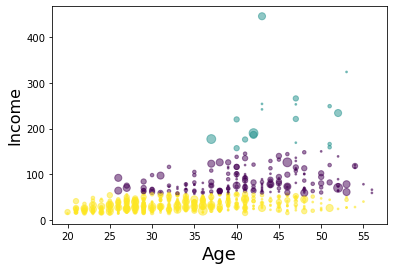

In [176]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

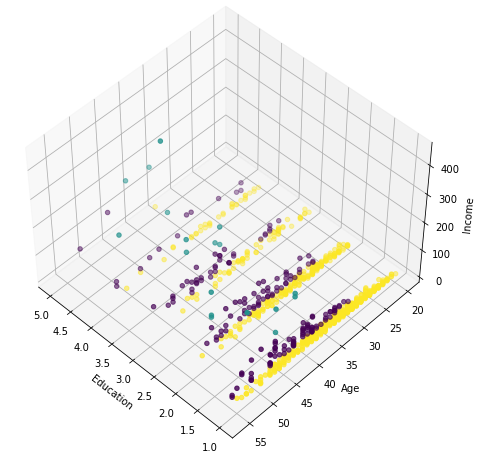

In [171]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= k_means.labels_.astype(np.float))

# Choosing the best k value

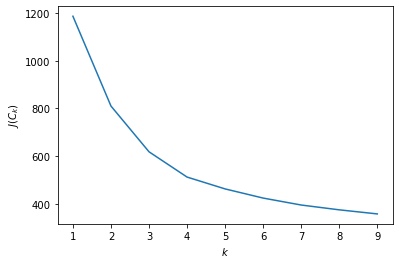

In [183]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=1, n_init=12).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia)
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

Optimum value of k is 4

In [184]:
k_means = KMeans(init='k-means++', n_clusters=4, n_init=12)
k_means.fit(X)
data['Clusters'] = k_means.labels_
data.head()

Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
Customer Id                                                            
1             41    2               6      19      0.124       1.073   
2             47    1              26     100      4.582       8.218   
3             33    2              10      57      6.111       5.802   
4             29    2               4      19      0.681       0.516   
5             47    1              31     253      9.308       8.908   

             Defaulted  DebtIncomeRatio  Clusters  
Customer Id                                        
1                  0.0              6.3         0  
2                  0.0             12.8         1  
3                  1.0             20.9         3  
4                  0.0              6.3         0  
5                  0.0              7.2         2

In [185]:
data.groupby('Clusters').mean()

Age       Edu  Years Employed      Income  Card Debt  \
Clusters                                                               
0         32.066071  1.610714        5.458929   28.076786   0.928905   
1         43.416667  2.183333       19.483333  123.400000   3.836667   
2         46.600000  2.300000       21.200000  270.900000   7.884000   
3         39.759091  1.809091       12.922727   62.900000   2.323045   

          Other Debt  Defaulted  DebtIncomeRatio  
Clusters                                          
0           1.894491   0.296137        10.107857  
1           7.340467   0.108696         9.036667  
2          13.375200   0.428571         8.210000  
3           4.463009   0.204420        10.732727

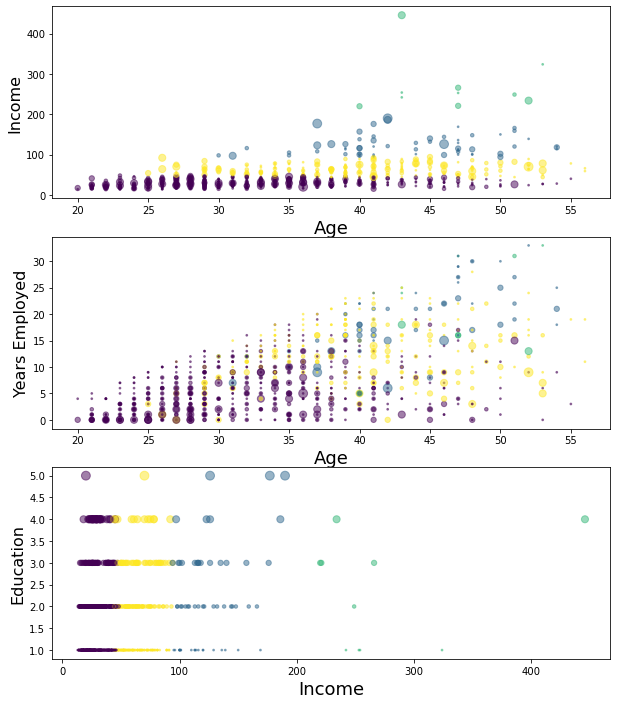

In [222]:
area = np.pi * ( X[:, 1])**2 
fig = plt.figure(figsize=(10, 12))
ageIncome = fig.add_subplot(3, 1, 1)
ageEdu = fig.add_subplot(3, 1, 2)
ax = fig.add_subplot(3, 1, 3)

ageIncome.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_.astype(np.float), alpha=0.5)
ageIncome.set_xlabel('Age', fontsize=18)
ageIncome.set_ylabel('Income', fontsize=16)

ageEdu.scatter(X[:, 0], X[:, 2], s=area, c=k_means.labels_.astype(np.float), alpha=0.5)
ageEdu.set_xlabel('Age', fontsize=18)
ageEdu.set_ylabel('Years Employed', fontsize=16)

ax.scatter(X[:, 3], X[:, 1], s=area, c=k_means.labels_.astype(np.float), alpha=0.5)
ax.set_xlabel('Income', fontsize=18)
ax.set_ylabel('Education', fontsize=16)

plt.show()

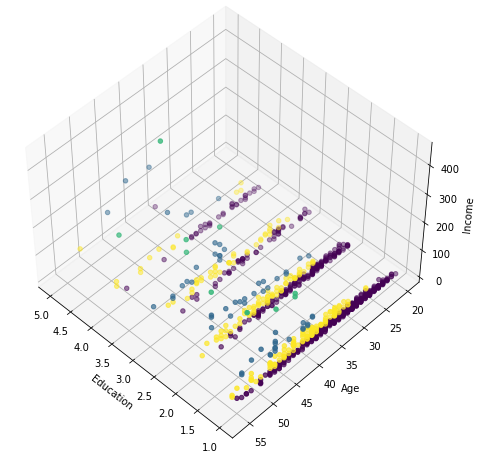

In [193]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= k_means.labels_.astype(np.float))